In [1]:
import json
import utils.plotting_tools as plot

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


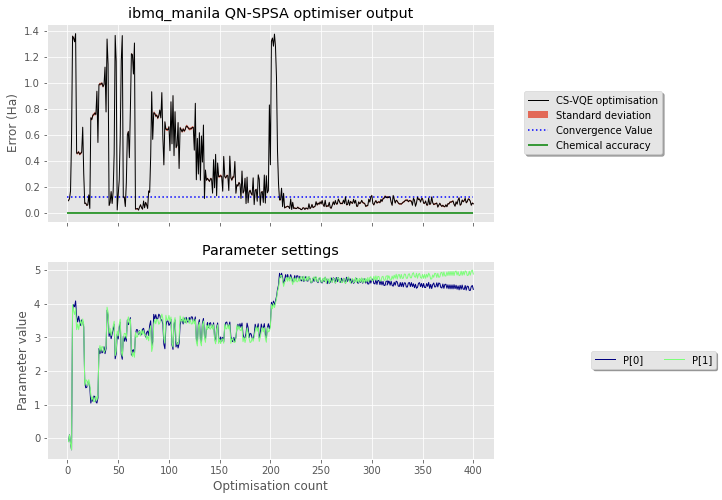

In [6]:
file = 'H3+_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)
fig.savefig('plots/'+file+'.png', dpi=300, bbox_inches='tight')

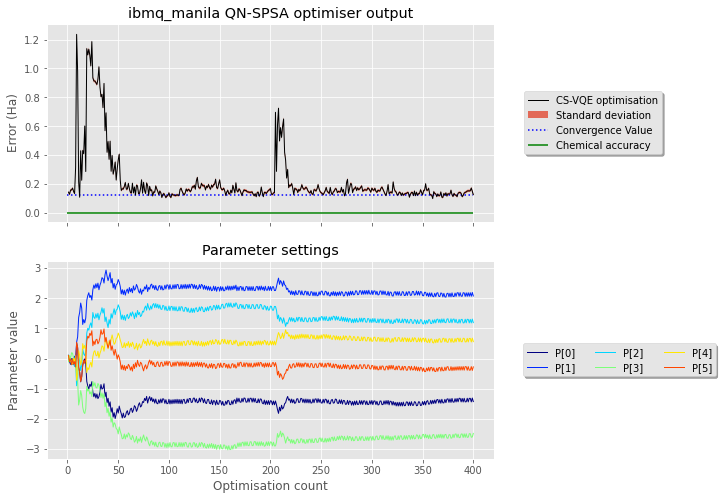

In [7]:
file = 'FH_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)
fig.savefig('plots/'+file+'.png', dpi=300, bbox_inches='tight')

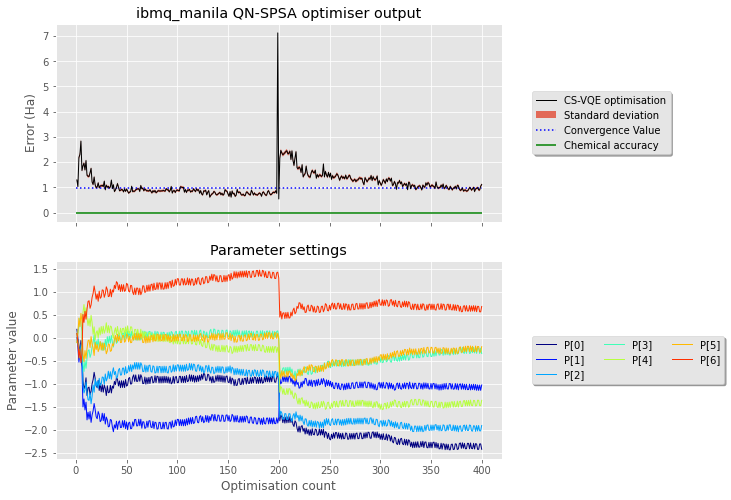

In [8]:
file = 'B+_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)
fig.savefig('plots/'+file+'.png', dpi=300, bbox_inches='tight')

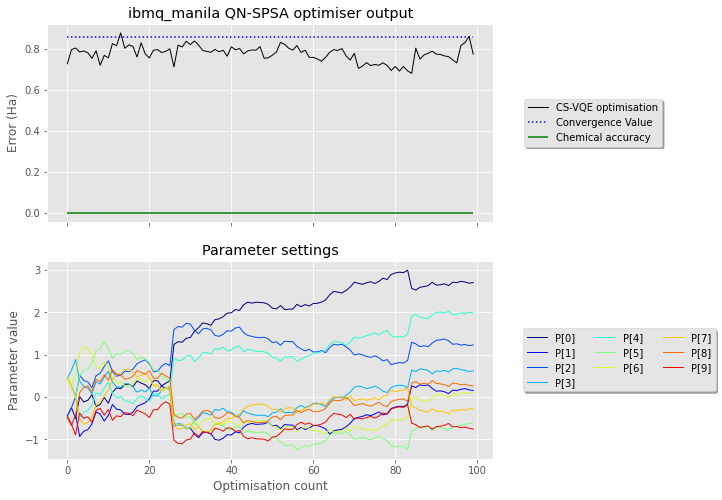

In [5]:
file = 'LiH_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)

In [90]:
import os
import itertools
import json
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

speciesnames = ['Be_STO-3G_SINGLET', 'B+_STO-3G_SINGLET', 'C_STO-3G_SINGLET', 'LiH_STO-3G_SINGLET', 'HF_STO-3G_SINGLET'] #'OH+_STO-3G_SINGLET'
meta_data = {'B+_STO-3G_SINGLET':{'num_sim_q':3,
                                  'true_gs':  -24.188150184262867},
            'Be_STO-3G_SINGLET': {'num_sim_q':3,
                                  'true_gs':  -14.40365510806773},
            'C_STO-3G_SINGLET':  {'num_sim_q':4,
                                  'true_gs':  -37.21873355063618},
            'LiH_STO-3G_SINGLET':{'num_sim_q':4,
                                 'true_gs':   -7.877029837040657},
            #'OH+_STO-3G_SINGLET':{'num_sim_q':5,
            #                     'true_gs':0},
            'HF_STO-3G_SINGLET': {'num_sim_q':4,
                                  'true_gs':0}
            }
cs_vqe_data={}

for speciesname in speciesnames:
    data_path = "data/IBMQ-runtime/"+speciesname
    cs_vqe_data[speciesname] = {}

    for job in os.listdir(data_path):
        for file in os.listdir(data_path+'/'+job):
            data_type = file[file.find('-')+1:file.find('.json')]
            with open('{}/{}/{}'.format(data_path, job, file), 'r') as json_file:
                vqe_results = json.load(json_file)
            if data_type == 'info':
                backend = vqe_results['backend']
            else:
                cs_vqe_data[speciesname][backend] = vqe_results
    
#cs_vqe_data

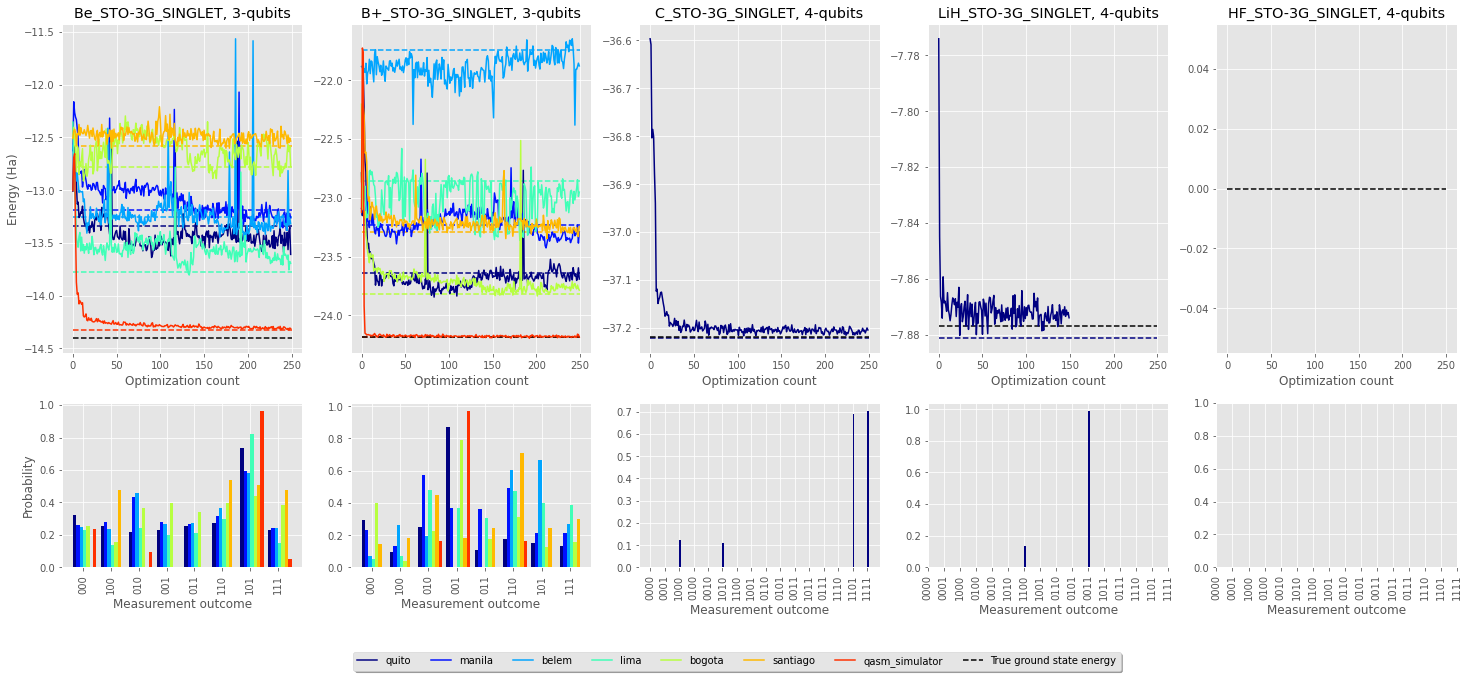

In [91]:
fig,axs=plt.subplots(nrows=2,
                     ncols=len(speciesnames), 
                     figsize=(5*len(speciesnames),10),
                     gridspec_kw={'height_ratios': [2, 1]})

num_sim_q = 3
width = 0.12

for grid_y, speciesname in enumerate(speciesnames):
    true_gs = meta_data[speciesname]['true_gs']
    num_sim_q = meta_data[speciesname]['num_sim_q']
    
    bit_strings = []
    combs = list(itertools.combinations_with_replacement([0,1], num_sim_q))
    for b in combs:
        bit_strings+=set(itertools.permutations(b))
    bit_strings = [''.join([str(a) for a in b]) for b in bit_strings]
    bit_map = {b:index for index, b in enumerate(bit_strings)}
    
    for index, backend in enumerate(cs_vqe_data[speciesname]):
        c = plt.cm.jet(index/len(cs_vqe_data[speciesname]))
        data = cs_vqe_data[speciesname][backend]
        l1 = axs[(0, grid_y)].plot(data['optimizer_history']['loss'], label=backend[5:], color=c)
        l2 = axs[(0, grid_y)].hlines(data['optimal_value'],0,250, ls='--', color=c)
        X, Y = list(zip(*list(data['eigenstate'].items())))
        X_indices = np.array([bit_map[x] for x in X])
        axs[(1, grid_y)].bar(X_indices+index*width, Y, width=width, color=c)

    l2 = axs[(0, grid_y)].hlines(true_gs,0,250, label='True ground state energy', ls='--', color='black')
    axs[(0, grid_y)].set_xlabel('Optimization count')
    axs[(0, grid_y)].set_title('%s, %i-qubits'%(speciesname, num_sim_q))
    axs[(1, grid_y)].set_xticks(np.arange(2**num_sim_q)+width*(len(cs_vqe_data[speciesname])/2-1))
    axs[(1, grid_y)].set_xticklabels(bit_strings, rotation=90)
    axs[(1, grid_y)].set_xlabel('Measurement outcome')

axs[(0, 0)].set_ylabel('Energy (Ha)')
axs[(1, 0)].set_ylabel('Probability')
handles, labels = axs[(0,0)].get_legend_handles_labels()
fig.legend(handles=handles,
           labels=labels,
           loc='lower center',
           borderaxespad=0.1,
           fancybox=True, 
           shadow=True,
           ncol=len(cs_vqe_data['B+_STO-3G_SINGLET'])+1,
           bbox_to_anchor=(0.5, -0.02))

In [87]:
fig.savefig('plots/CS-VQE_paper/IBMQ-runtime_plots.png', dpi=300, bbox_inches='tight')

OSError: [Errno 22] Invalid argument: 'plots/CS-VQE_paper/IBMQ-runtime_plots.png'